# Wheat Disease Detection
# 1.1 Introduction
In this iPython notebook, we will explore the use of advanced neural network models such as VGG19, Xception, and InceptionV3 to detect diseases in wheat plants. By leveraging pre-trained weights from ImageNet, we can accelerate training and improve model performance for this computer vision task.

# The workflow involves:
Importing and loading essential libraries for image processing and model training.
Preprocessing images and making them compatible with Keras.
Training the neural networks to classify wheat images as healthy or diseased.

This approach provides an efficient pipeline for detecting diseases in wheat plants using deep learning.

# 1.2 Metrics
To evaluate the performance of our models, we will use the following metrics:

Categorical Cross-Entropy Loss: Measures how well the predicted probability distribution aligns with the true labels.
Accuracy: The proportion of correctly classified images over the total images.

# 1.3 Classes

The dataset consists of images classified into four categories:
1.Leaf Rust

2.Crown and Root Rot

3.Healthy Wheat

4.Wheat Loose Smut

Each class contains approximately 4,500 images. For evaluation, 20% of the data will be used as the test set using stratified sampling to ensure balanced representation of all classes.

# Importing Libraries

The following libraries will be used to facilitate image preprocessing, model training, and evaluation:

TensorFlow & Keras – for building and training neural networks

NumPy & Pandas – for numerical operations and data handling

Matplotlib & Seaborn – for visualization

Scikit-learn – for data splitting and evaluation metrics

These libraries provide a robust framework for implementing convolutional neural networks and handling image data efficiently.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19
import cv2
import os 
import pickle
from imutils import paths
from tqdm import tqdm
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.applications import Xception, ResNet152, InceptionV3, NASNetLarge
%matplotlib inline

2026-01-03 17:19:49.981984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767460790.195449      25 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767460790.252716      25 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767460790.741717      25 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767460790.741768      25 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767460790.741771      25 computation_placer.cc:177] computation placer alr

In [2]:
LABELS = set(["Crown and Root Rot", "Healthy Wheat", "Leaf Rust", "Wheat Loose Smut"])


In [3]:
from imutils import paths
count = 0
for image_path in paths.list_images('/kaggle/input/dataset/Dataset/Crown and Root Rot'):
    print(image_path)
    count += 1
    if count == 5:
        break


/kaggle/input/dataset/Dataset/Crown and Root Rot/02371.jpg
/kaggle/input/dataset/Dataset/Crown and Root Rot/02621.jpg
/kaggle/input/dataset/Dataset/Crown and Root Rot/00091.jpg
/kaggle/input/dataset/Dataset/Crown and Root Rot/08171.jpg
/kaggle/input/dataset/Dataset/Crown and Root Rot/04211.jpg


In [4]:
image = cv2.imread('/kaggle/input/dataset/Dataset/Crown and Root Rot/02371.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))


In [5]:
#We find a way to get the name of the image to be used from paths.
sample_path=list(paths.list_images('/kaggle/input/dataset/Dataset/Crown and Root Rot'))[0]

In [6]:
sample_path

'/kaggle/input/dataset/Dataset/Crown and Root Rot/02371.jpg'

In [7]:
#Let us now split the path to get our desired result of the image.
sample_path.split('/')

['',
 'kaggle',
 'input',
 'dataset',
 'Dataset',
 'Crown and Root Rot',
 '02371.jpg']

In [8]:
import os
dataset_path = '/kaggle/input/dataset/Dataset'  # where your zip was extracted
Labels = os.listdir(dataset_path)
print("Class folders:", Labels)


Class folders: ['Healthy Wheat', 'Wheat Loose Smut', 'Leaf Rust', 'Crown and Root Rot']


In [9]:
CROWN_AND_ROOT_ROT_PATH ='/kaggle/input/dataset/Dataset/Crown and Root Rot'
HEALTHY_AND_WHEAT_PATH = '/kaggle/input/dataset/Dataset/Healthy Wheat'
LEAF_RUST_PATH = '/kaggle/input/dataset/Dataset/Leaf Rust'
WHEAT_LOOSE_SMUT_PATH = '/kaggle/input/dataset/Dataset/Wheat Loose Smut'

In [10]:
data = []
labels = []
for image_path in tqdm(paths.list_images(CROWN_AND_ROOT_ROT_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    
    label = image_path.split('/')[-2]
    
    labels.append(label)
    
for image_path in tqdm(paths.list_images(HEALTHY_AND_WHEAT_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    
    label = image_path.split('/')[-2]
    
    labels.append(label)

for image_path in tqdm(paths.list_images(LEAF_RUST_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    
    label = image_path.split('/')[-2]
    
    labels.append(label)
    
for image_path in tqdm(paths.list_images(WHEAT_LOOSE_SMUT_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    
    label = image_path.split('/')[-2]
    
    labels.append(label)
    

83it [00:00, 113.16it/s]libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
654it [00:04, 130.88it/s]libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
869it [00:06, 133.34it/s]libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
1021it [00:07, 132.61it/s]
1146it [00:22, 50.12it/s]
84it [00:05, 14.05it/s]
930it [00:06, 132.97it/s]


In [11]:
labels[-1]

'Wheat Loose Smut'

# Transfer Learning
Transfer learning is a method in deep learning where a model that is developed for a particular task is reused as the starting point for our model so that we get it for our use cases.

In the below cells, transfer learning is applied which ensures that models are not trained from the start. Instead only the last few layers for our application are trained. This leads to a good reduction in the time taken to train them. Furthermore, this leads to a good improvement in the accuracy of the model as state-of-the-art models are taken for training the models.

# VGG19 Network
VGG19 nework trained on imagenet weights is taken as our base model. In addition to this network, we add more layers so that the final model is used for our task of detecting and identifying wheat diseases.

In [12]:
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(Labels), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False


I0000 00:00:1767460849.448199      25 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1767460849.452017      25 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=1e-3)  # 'lr' is deprecated in TF 2.x
final_model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)


In [14]:
data = np.array(data)
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [15]:
labels[0]

array([1, 0, 0, 0])

In [16]:
X_train, X_cv, y_train, y_cv = train_test_split(data, labels, test_size = 0.2,
                                                    stratify = labels, random_state = 101)

In [17]:
len(X_train)

2544

In [18]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1890266700606684979
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619443200
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 1625737530273595834
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 14619443200
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 7973118103948230200
physical_device_desc: "device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5"
xla_global_id: 2144165316
]


I0000 00:00:1767460852.142576      25 gpu_device.cc:2019] Created device /device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1767460852.142781      25 gpu_device.cc:2019] Created device /device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [19]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               epochs = 30, batch_size = 64)

Epoch 1/30


I0000 00:00:1767460854.334310      75 service.cc:152] XLA service 0x790bc09be950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767460854.334350      75 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1767460854.334354      75 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1767460854.852800      75 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1767460878.114037      75 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5038 - loss: 3.2680 - val_accuracy: 0.8100 - val_loss: 0.6217
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 575ms/step - accuracy: 0.8315 - loss: 0.5209 - val_accuracy: 0.8744 - val_loss: 0.3963
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 540ms/step - accuracy: 0.9030 - loss: 0.2920 - val_accuracy: 0.8885 - val_loss: 0.3132
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 531ms/step - accuracy: 0.9400 - loss: 0.2131 - val_accuracy: 0.9309 - val_loss: 0.2369
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 541ms/step - accuracy: 0.9606 - loss: 0.1368 - val_accuracy: 0.9451 - val_loss: 0.1828
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 552ms/step - accuracy: 0.9620 - loss: 0.1398 - val_accuracy: 0.9545 - val_loss: 0.1858
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 545ms/step - accuracy: 0.9711 - loss: 0.1121 - val_accuracy: 0.9655 - val_loss: 0.1507
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 542ms/step - accuracy: 0.9811 - loss: 0.0810 - val_accuracy: 0.9545 -

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 501ms/step


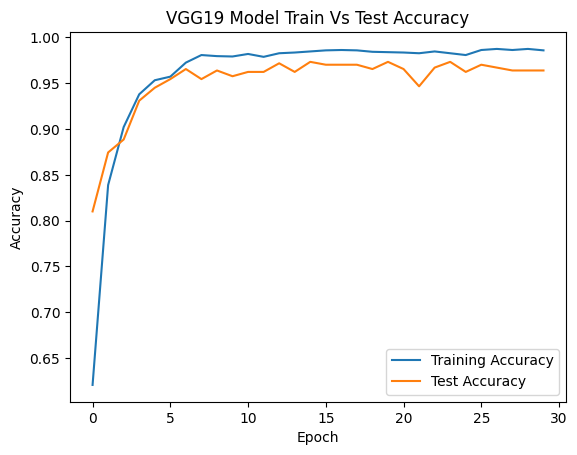

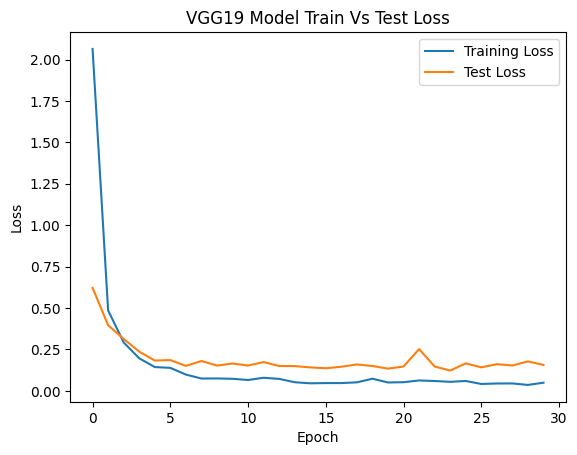

<Figure size 640x480 with 0 Axes>

In [20]:
predictions = final_model.predict(X_cv, batch_size = 64)
N = 30
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = 'Training Accuracy')
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('VGG19 Model Train Vs Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.show()
plt.savefig(r"D:\Project\Wheat main\Images\VGG19_accuracy_plots.png")

plt.plot(fitted_model.history['loss'], label = "Training Loss")
plt.plot(fitted_model.history['val_loss'], label = "Test Loss")
plt.title("VGG19 Model Train Vs Test Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.show()
plt.savefig(r"D:\Project\Wheat main\Images\VGG19_loss_plot.png")

In [21]:
import pickle 
model_file_path = "D:\Project\Wheat main"

In [22]:
pickle.dump(model, open(model_file_path, 'wb'))

In [23]:
with open('model_pkl', 'wb') as files:
    pickle.dump(final_model, files)

In [24]:

final_model.save("D:\Project\Wheat main.h5")

In [25]:
data = []
labels = []
for image_path in tqdm(paths.list_images(CROWN_AND_ROOT_ROT_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (299, 299))
    data.append(image)
    
    label = image_path.split('/')[-2]
    
    labels.append(label)
    
for image_path in tqdm(paths.list_images(HEALTHY_AND_WHEAT_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (299, 299))
    data.append(image)
    
    label = image_path.split('/')[-2]
    
    labels.append(label)

for image_path in tqdm(paths.list_images(LEAF_RUST_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (299, 299))
    data.append(image)
    
    label = image_path.split('/')[-2]
    
    labels.append(label)
    
for image_path in tqdm(paths.list_images(WHEAT_LOOSE_SMUT_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (299, 299))
    data.append(image)
    
    label = image_path.split('/')[-2]
    
    labels.append(label)

95it [00:01, 130.81it/s]libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
645it [00:03, 228.34it/s]libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
871it [00:04, 204.61it/s]libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
1021it [00:05, 199.78it/s]
1146it [00:17, 66.13it/s]
84it [00:05, 16.17it/s]
930it [00:04, 201.37it/s]


In [26]:
data = np.array(data)
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [27]:
X_train, X_cv, y_train, y_cv = train_test_split(data, labels, test_size = 0.2,
                                                    stratify = labels, random_state = 101)

## Xception Network
It is now time to train an xception network to see how the training accuracy and the cross-validation accuracy increases with increase in the number of epochs.

As could be seen below from the architecture, the input shape that is accepted by Xception network is (299, 299, 3). Therefore, we did a good thing in the above cells in resizing the images to be of (299, 299) shape.

In [28]:
headmodel = Xception(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(Labels), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [29]:
opt = Adam(learning_rate = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [30]:

fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               epochs = 30, batch_size = 64)

Epoch 1/30


2026-01-03 17:33:48.181578: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv %cudnn-conv.76 = (f32[64,64,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,64,147,147]{3,2,1,0} %bitcast.7672, f32[64,1,3,3]{3,2,1,0} %bitcast.7586), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=64, custom_call_target="__cudnn$convForward", metadata={op_type="DepthwiseConv2dNative" op_name="functional_1_1/block2_sepconv1_1/separable_conv2d/depthwise" source_file="/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2026-01-03 17:33:48.244664: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.063170961s
Trying algo

39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.4806 - loss: 31.1941

2026-01-03 17:35:07.214433: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv %cudnn-conv.78 = (f32[48,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[48,128,147,147]{3,2,1,0} %bitcast.7627, f32[128,1,3,3]{3,2,1,0} %bitcast.7631), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", metadata={op_type="DepthwiseConv2dNative" op_name="functional_1_1/block2_sepconv2_1/separable_conv2d/depthwise" source_file="/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2026-01-03 17:35:07.843585: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.629364947s
Trying 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4819 - loss: 30.8415   

2026-01-03 17:36:01.924423: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv %cudnn-conv.76 = (f32[61,64,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[61,64,147,147]{3,2,1,0} %bitcast.4906, f32[64,1,3,3]{3,2,1,0} %bitcast.4820), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=64, custom_call_target="__cudnn$convForward", metadata={op_type="DepthwiseConv2dNative" op_name="functional_1_1/block2_sepconv1_1/separable_conv2d/depthwise" source_file="/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2026-01-03 17:36:01.958918: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.034598895s
Trying algo

40/40 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.4830 - loss: 30.5061 - val_accuracy: 0.6405 - val_loss: 2.5791
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 708ms/step - accuracy: 0.6451 - loss: 2.0283 - val_accuracy: 0.7410 - val_loss: 0.7251
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 721ms/step - accuracy: 0.7465 - loss: 0.6918 - val_accuracy: 0.7849 - val_loss: 0.6115
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 700ms/step - accuracy: 0.8185 - loss: 0.5308 - val_accuracy: 0.8273 - val_loss: 0.5393
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 710ms/step - accuracy: 0.8451 - loss: 0.4377 - val_accuracy: 0.8414 - val_loss: 0.5119
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 715ms/step - accuracy: 0.8658 - loss: 0.3744 - val_accuracy: 0.8681 - val_loss: 0.4329
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 708ms/step - accuracy: 0.8689 - loss: 0.3375 - val_accuracy: 0.8367 - val_loss: 0.5137
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 707ms/step - accuracy: 0.8886 - loss: 0.3140 - val_accuracy: 0.8728

# InceptionV3 Network
In the below cells, InceptionV3 network would be implemented with the weights taken from imagenet data. Inception weights are not trained and additional layers that are added on top of inception are trained to help us get the output for our prediction of disease in wheat.

In [31]:
headmodel = InceptionV3(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dense(256, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(Labels), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False
    

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [32]:
opt = Adam(learning_rate=1e-3)

final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [33]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               epochs = 30, batch_size = 64)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.3835 - loss: 24.9942 - val_accuracy: 0.5400 - val_loss: 1.6659
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.4911 - loss: 1.7645 - val_accuracy: 0.5542 - val_loss: 1.0853
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.5572 - loss: 1.0678 - val_accuracy: 0.6374 - val_loss: 0.9670
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.6182 - loss: 0.9087 - val_accuracy: 0.6358 - val_loss: 0.9436
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 302ms/step - accuracy: 0.6831 - loss: 0.7990 - val_accuracy: 0.6327 - val_loss: 0.8920
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 300ms/step - accuracy: 0.6938 - loss: 0.7439 - val_accuracy: 0.6939 - val_loss: 0.8463
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 299ms/step - accuracy: 0.7497 - loss: 0.6485 - val_accuracy: 0.6892 - val_loss: 0.8665
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 298ms/step - accuracy: 0.7574 - loss: 0.6400 - val_accura

# ResNet152 Network
ResNet152 is used to check the performance of the models. Sometimes we are under the assumption that adding more layers in the neural network would reduce the training and test loss.

According to experiments, however, we see that adding more layers in our network would not decrease the training loss to a large extent.

Below is the implementation of ResNet152 Network. Feel free to take a look.

In [34]:
headmodel = ResNet152(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(Labels), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [35]:
opt = Adam(learning_rate=1e-3)

final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               epochs = 30, batch_size = 64)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5664 - loss: 4.0967 - val_accuracy: 0.8273 - val_loss: 0.4540
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8815 - loss: 0.3071 - val_accuracy: 0.9419 - val_loss: 0.1959
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9625 - loss: 0.1141 - val_accuracy: 0.9560 - val_loss: 0.1479
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9796 - loss: 0.0979 - val_accuracy: 0.9592 - val_loss: 0.1550
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9875 - loss: 0.0540 - val_accuracy: 0.9702 - val_loss: 0.1271
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9834 - loss: 0.0615 - val_accuracy: 0.9639 - val_loss: 0.1409
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9863 - loss: 0.0595 - val_accuracy: 0.9608 - val_loss: 0.1366
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9819 - loss: 0.0692 - val_accuracy: 0.9717 - val_loss